This file is for converting folders of images into the needed numpy arrays we need for testing.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import os
from PIL import Image
import torch
import torch.nn as nn
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm

In [ ]:
# Set the path to your target folder
folder = '25-rain_GAN'
folder_path = f'/content/drive/Shareddrives/VisualCompGroupProject/rain_GAN/{folder}'

num_images = len([f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.png'))])
print(num_images)

12630


In [ ]:
# find all hidden files
hidden_files = []
for item in os.listdir(folder_path):
    item_path = os.path.join(folder_path, item)
    if os.path.isfile(item_path) and item.startswith('.'):
        hidden_files.append(item_path)

print(hidden_files)

[]


In [ ]:
# For removing repeated files
for item in os.listdir(folder_path):
    file,_ = os.path.splitext(item)
    try:
      if int(file):
        continue
    except:
      print(item)
      item_path = os.path.join(folder_path, item)
      os.remove(item_path)

09970 (1).png


In [ ]:
# convert folder of images to numpy

# numpy array
arr = []

# List and print all files
count = 0
#for filename in os.listdir(folder_path):
for i in range(num_images):
    filename = str(i).zfill(5) + ".png"
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        if i % 1000 == 0:
            print(filename)
        img = Image.open(file_path)
        img_array = np.array(img)
        arr.append(img_array)
    else:
        print("ERROR AT", i)
        break

# Convert list to NumPy array
image_data = np.stack(arr)
print(image_data.shape)

# Save the numpy file
#np.save("rain_GAN.npy", image_data)

00000.png
01000.png
02000.png
03000.png
04000.png
05000.png
06000.png
07000.png
08000.png
09000.png
10000.png
11000.png
12000.png
(12630, 256, 256, 3)


(12630, 256, 256, 3)
uint8


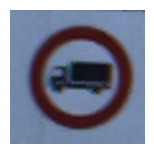

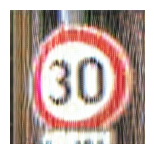

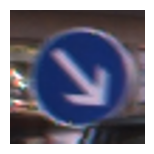

In [ ]:
import matplotlib.pyplot as plt

# Load the array from the binary file
#loaded_arr = np.load('rain_GAN.npy')
loaded_arr = image_data

print(loaded_arr.shape)
print(loaded_arr.dtype)

for i in range(3):
    img = loaded_arr[i]
    plt.figure(figsize=(2, 2))
    plt.imshow(img)
    plt.tight_layout()
    plt.axis('off')
    plt.show()

In [ ]:
# save the files
np.save("rain_GAN.npy", image_data)